# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
class NeuralNet:
    def __init__(self, X, Y, nodos, p_split, learning_rate, epocas, fn_activation='relu'):
        self.X = X
        self.Y = Y
        self.nodos = nodos
        self.p_split = p_split
        self.learning_rate = learning_rate
        self.epocas = epocas
        
        if fn_activation == 'relu':
            self.activation = self.relu
            self.dactivation = self.drelu
        elif fn_activation == 'sigmoide':
            self.activation = self.sigmoid
            self.dactivation = self.dsigmoid
        elif fn_activation == 'tanh':
            self.activation = self.tanh
            self.dactivation = self.dtanh
        elif fn_activation == 'identidad':
            self.activation = self.iden
            self.dactivation = self.diden  

    def relu(self, x):
        return x * (x > 0)

    def drelu(self, x):
        return 1. * (x > 0)

    #IDENTIDAD
    def iden(self, X):
        return X

    def diden(self, X):
        return 1

    #SIGMOIDE
    def sigmoid(self, X):
        return 1/(1.0+np.exp(-X))

    def dsigmoid(self, X):
        return sigmoid(X)*(1-sigmoid(X))

    def tanh(self, X):
        return np.tanh(X)
    
    def dtanh(self, X):
        return 1-tanh(X)**2
    # Definimos la estructura de la red
    
    def error(self, vector):
        m = len(vector)
        mse = (1/(2*m))*np.linalg.norm(vector)**2
        return mse
    
    def split(self, X, Y, p_split): #El p_split debe estar dado entre 0 y 1
        nparams = len(X)
        randomize = np.random.permutation(nparams)
        X = X[randomize]
        Y = Y[randomize]
        ntrain = int(p_split * nparams)
        indx = [ntrain]
        X_train, X_test = np.split(X, indx)
        Y_train, Y_test = np.split(Y, indx)
    
        return X_train, Y_train, X_test, Y_test
    
    def entrenar(self):
        n_entradas=len(self.X[0])
        n_salidas=len(self.Y[0])

        #definimos los conjuntos de aprendizaje y validación 
        X_learn,Y_learn,X_val,Y_val = self.split(self.X, self.Y, self.p_split)

        #forward
        W1 = np.random.randn(n_entradas,self.nodos)
        W2 = np.random.randn(self.nodos, n_salidas)
        b1 = np.random.randn(self.nodos)
        b2 = np.random.randn(n_salidas)

        #épocas
        self.errores=[]
        self.validacion=[]
        for i in range(self.epocas):
            #Forward
            z1=np.dot(X_learn,W1)+b1
            a1=self.activation(z1)
            z2=np.dot(a1,W2)+b2
            a2=z2

            #backpropagation
            delta2 = a2 - Y_learn
            delta1 = (delta2).dot(W2.T)*self.dactivation(z1)

            self.errores.append(self.error(delta2)) #guardamos el error de cada época

            W2 -= self.learning_rate * a1.T.dot(delta2)
            b2 -= self.learning_rate * (delta2).sum(axis=0)

            W1 -= self.learning_rate * X_learn.T.dot(delta1)
            b1 -= self.learning_rate * (delta1).sum(axis=0)

            print("Época: %d, Error: %f" %(i+1, self.error(delta2)))

            #Ahora validamos el modelo
            z1 = np.dot(X_val, W1) + b1
            a1 = self.activation(z1)
            z2 = np.dot(a1,W2)+b2
            a2 = z2
            delta = a2-Y_val
            self.validacion.append(self.error(delta))
        
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2   

    def plot(self):
#         for i in range(self.epocas):
        plt.plot(range(self.epocas),self.errores,color='darkcyan',label='Aprendizaje')
        plt.plot(range(self.epocas),self.validacion,color='darkred',label='Validación')
        plt.grid()
        plt.legend()
     

    def evaluar(self, x):
        z1=np.dot(x,self.W1)+self.b1
        a1=self.activation(z1)
        z2=np.dot(a1,self.W2)+self.b2
        a2=z2
        return a2

In [56]:
#Función a emular

# X = 3.14*2*np.random.rand(1000,1)
X = np.random.rand(1000,1)
    
Y = np.abs(np.sin(X))

np.max(Y)

0.8398686095945809

In [57]:
neuralnet = NeuralNet(X, Y, nodos=100, p_split=0.8, learning_rate=1e-6, 
                           epocas=100, fn_activation='relu')
neuralnet.entrenar()

Época: 1, Error: 100.413016
Época: 2, Error: 80.060211
Época: 3, Error: 63.944090
Época: 4, Error: 51.153330
Época: 5, Error: 40.972032
Época: 6, Error: 32.849643
Época: 7, Error: 26.361783
Época: 8, Error: 21.172386
Época: 9, Error: 17.017092
Época: 10, Error: 13.687590
Época: 11, Error: 11.019845
Época: 12, Error: 8.880366
Época: 13, Error: 7.163502
Época: 14, Error: 5.785047
Época: 15, Error: 4.676644
Época: 16, Error: 3.785052
Época: 17, Error: 3.067341
Época: 18, Error: 2.489452
Época: 19, Error: 2.023977
Época: 20, Error: 1.648781
Época: 21, Error: 1.346114
Época: 22, Error: 1.101891
Época: 23, Error: 0.904703
Época: 24, Error: 0.745411
Época: 25, Error: 0.616680
Época: 26, Error: 0.512593
Época: 27, Error: 0.428394
Época: 28, Error: 0.360241
Época: 29, Error: 0.305036
Época: 30, Error: 0.260282
Época: 31, Error: 0.223972
Época: 32, Error: 0.194479
Época: 33, Error: 0.170495
Época: 34, Error: 0.150963
Época: 35, Error: 0.135026
Época: 36, Error: 0.121995
Época: 37, Error: 0.11131

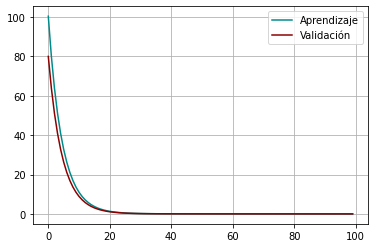

In [58]:
neuralnet.plot()

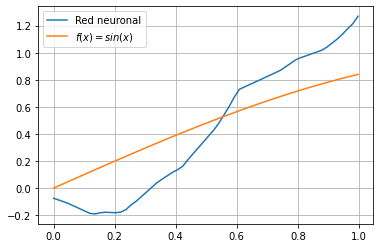

In [59]:
z = np.linspace(np.min(X), np.max(X), 60).reshape(-1, 1)

plt.plot(z, neuralnet.evaluar(z),label='Red neuronal')
plt.plot(z, np.abs(np.sin(z)), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()